### 🖥️회귀 프로젝트 3: 가전제품 에너지 사용량 회귀 예측

- 저에너지(low-energy) 건물 내에서 ZigBee 무선 센서 네트워크로 수집된 데이터와,  
  Chievres 기상 관측소에서 수집된 데이터를 결합한 데이터 세트입니다.

#### 📚 Features

- date: 측정 날짜 및 시간
- lights: 조명 장치의 전기 에너지 사용량
- T1: 부엌의 온도
- RH_1: 부엌의 습도
- T2: 거실의 온도
- RH_2: 거실의 습도
- T3: 세탁실의 온도
- RH_3: 세탁실의 습도
- T4: 사무실의 온도
- RH_4: 사무실의 습도
- T5: 욕실의 온도
- RH_5: 욕실의 습도
- T6: 건물 밖(북쪽)의 온도
- RH_6: 건물 밖(북쪽)의 습도
- T7: 다리미방의 온도
- RH_7: 다리미방의 습도
- T8: 청소년실2의 온도
- RH_8: 청소년실2의 습도
- T9: 부모님 방(안방)의 온도
- RH_9: 부모님 방(안방)의 습도
- T_out: 바깥(Chievres weather station)의 온도
- Press_mm_hg: 바깥(Chievres weather station)의 대기압
- RH_out: 바깥(Chievres weather station)의 습도
- Windspeed: 바깥(Chievres weather station)의 풍속
- Visibility: 바깥(Chievres weather station)의 가시거리
- Tdewpoint: 바깥(Chievres weather station)의 이슬점 온도
- rv1: 랜덤한 변량 1
- rv2: 랜덤한 변량 2
  
#### 🎈 Target

- Appliances: 에너지 사용량 (Wh)

---

#### 📌 목차

*🎈Cycle 1*
1. 데이터 탐색 및 전처리
2. PCA를 통한 차원 축소
3. 선형 회귀 분석
4. 트리 기반 회귀 모델을 사용한 회귀 분석

*🎈Cycle 2*
1. OLS, VIF 확인 및 데이터 전처리
2. PCA를 통한 차원 축소
3. 선형 회귀 분석
4. 트리 기반 회귀 모델을 사용한 회귀 분석

*🎈Cycle 3*
1. feature별 분포 확인 및 전처리
2. 선형 회귀 분석
3. lights feature에 언더샘플링 적용
4. 언더샘플링 이후 선형 회귀 분석
5. 언더샘플링 이후 트리 기반 모델을 사용한 회귀 분석

*🎈Cycle 4*
1. 데이터 전처리
2. 선형 회귀 분석
3. 트리 기반 모델을 사용한 회귀 분석
4. GridSearchCV, RandomForestRegressor 모델을 사용한 회귀 분석

***📌Cycle 1 ~ Cycle 4, R<sup>2</sup> 및 MSE Loss 값 비교***

#### *🎈Cycle 1*
#### 1. 데이터 탐색 및 전처리

In [1]:
import pandas as pd

a_df = pd.read_csv('./datasets/appliances_energy.csv', low_memory=False)
a_df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


- 데이터의 정보를 확인해봅니다.

In [2]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

- 결측치가 없음을 확인할 수 있습니다.
- 중복행을 확인합니다.

In [3]:
a_df.duplicated().sum()

0

- 데이터의 분포를 히스토그램으로 확인해봅니다.

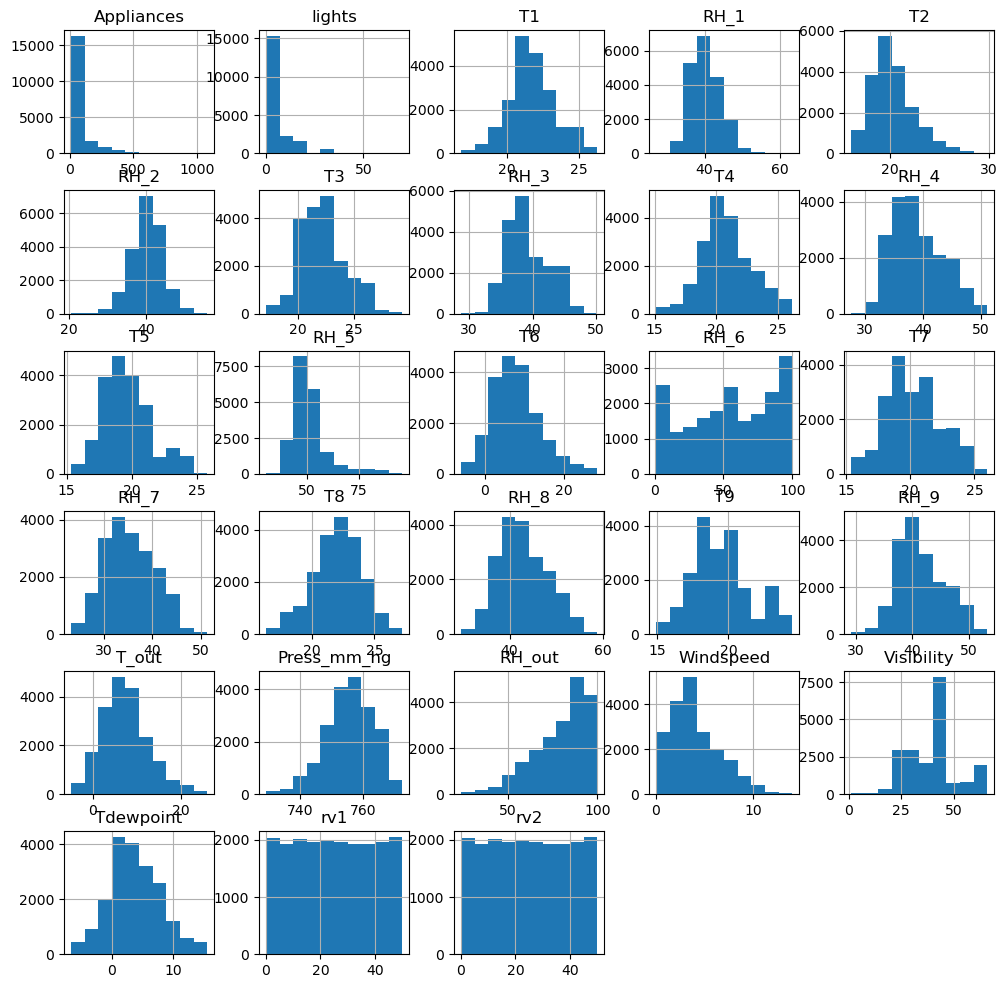

In [4]:
import matplotlib.pyplot as plt

a_df.hist(figsize=(12, 12))
plt.show()

- 종속변수의 분포가 좌측으로 치우쳐 나타나므로, 다시 한 번 확인 후 스케일링 진행 여부를 결정합니다.

<Axes: >

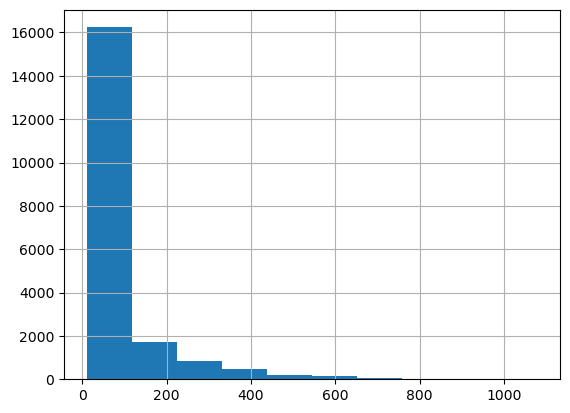

In [5]:
a_df.Appliances.hist()

- 종속변수에 np.log1p() 스케일링을 적용하기로 합니다.

<Axes: >

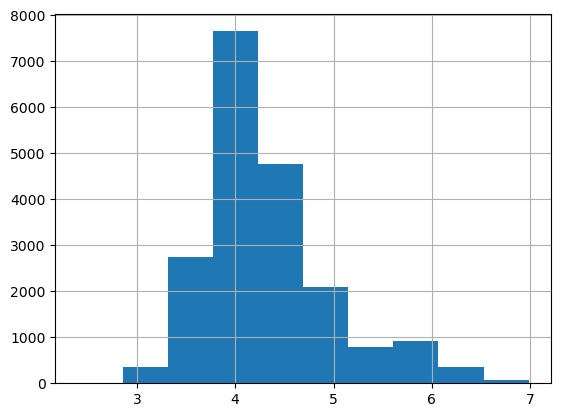

In [6]:
import numpy as np

np.log1p(a_df.Appliances).hist()

In [7]:
pre_a_df = a_df.copy()
pre_a_df.Appliances = np.log1p(pre_a_df.Appliances)
pre_a_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,4.110874,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,4.110874,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,3.931826,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,3.931826,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,4.110874,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,4.615121,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,4.510860,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,5.602119,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,6.042633,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


- corr()을 통해 상관관계를 확인하고, seaborn의 heatmap으로 시각화해봅니다.
- 상관관계를 확인하기 전, object 타입이며 회귀 예측에 불필요하다고 판단되는 date feature를 삭제합니다.

In [8]:
pre_a_df = pre_a_df.drop(labels=['date'], axis=1)
pre_a_df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,4.110874,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,4.110874,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,3.931826,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,3.931826,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,4.110874,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,4.615121,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,4.510860,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,5.602119,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,6.042633,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pre_a_df.corr()
corr

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.261143,0.159378,0.084757,0.213784,-0.093405,0.166157,-0.005733,0.131058,-0.006104,...,0.091284,-0.114999,0.175421,-0.072173,-0.225690,0.088046,-0.010854,0.055700,-0.010223,-0.010223
lights,0.261143,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.159378,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.084757,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.213784,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.093405,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.166157,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,-0.005733,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.131058,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,-0.006104,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


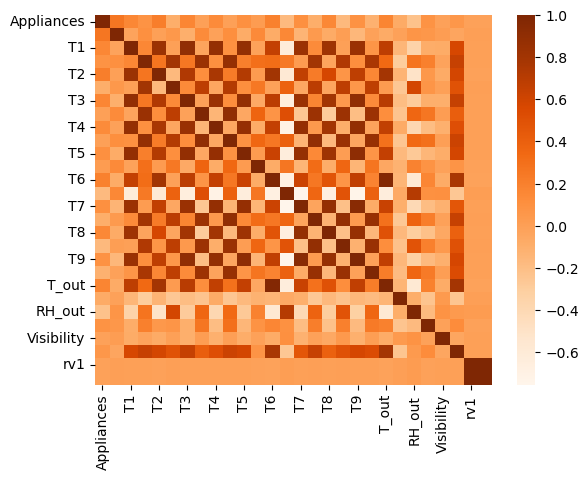

In [10]:
corr_heatmap = sns.heatmap(corr, cmap='Oranges')
plt.show()

- 독립변수 간의 상관관계가 대체로 크게 나타남을 알 수 있습니다.
- 또한 종속변수와의 상관관계가 높은 feature를 확인하기 어려우므로, 수치를 통해 확인해봅니다.

In [11]:
corr['Appliances'].sort_values(ascending=False)[1:]

lights         0.261143
T2             0.213784
T6             0.195821
T_out          0.175421
T3             0.166157
T1             0.159378
T8             0.152368
T4             0.131058
T7             0.109174
T5             0.108803
T9             0.091284
Windspeed      0.088046
RH_1           0.084757
Tdewpoint      0.055700
RH_5           0.024272
RH_3          -0.005733
RH_4          -0.006104
rv1           -0.010223
rv2           -0.010223
Visibility    -0.010854
Press_mm_hg   -0.072173
RH_2          -0.093405
RH_7          -0.095861
RH_9          -0.114999
RH_8          -0.164760
RH_6          -0.173072
RH_out        -0.225690
Name: Appliances, dtype: float64

- 종속변수와의 상관관계 절댓값이 0.3을 넘는 독립변수가 존재하지 않았습니다.
- feature의 개수 또한 date 삭제 후 총 27개이므로, 차원 축소를 진행해야 한다고 판단하였습니다.
- PCA를 통한 차원 축소를 진행하여 독립 변수 간의 상관관계로 인해 나타날 수 있는 다중 공선성 문제를 해결하고,  
  계산의 효율성을 높이고자 합니다.
- 차원 축소를 진행하기 전, StandardScaler()을 통한 표준화로 이상치를 제거합니다.

In [12]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
features, targets = pre_a_df.iloc[:, 1:], pre_a_df.iloc[:, 0]

std_features = std.fit_transform(features)
std_a_df = pd.DataFrame(std_features, columns=pre_a_df.columns[1:])
std_a_df

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,-1.314903,...,-1.217324,0.958136,-0.152647,-2.976328,0.822080,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,-1.314903,...,-1.200778,0.965363,-0.174588,-2.962813,0.822080,1.071703,1.766584,0.343135,-0.440240,-0.440240
2,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,-1.314903,...,-1.233869,0.950910,-0.196529,-2.949298,0.822080,0.935713,1.441572,0.319294,0.252109,0.252109
3,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,-1.314903,...,-1.233869,0.926821,-0.218470,-2.935783,0.822080,0.799723,1.116559,0.295454,1.408801,1.408801
4,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,-1.296832,...,-1.233869,0.926821,-0.240411,-2.922268,0.822080,0.663733,0.791547,0.271613,-1.028122,-1.028122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,-0.479080,2.415962,1.583299,2.530318,0.394449,2.458745,0.590209,1.882026,1.511812,1.955947,...,1.843571,1.261649,2.881489,-0.043599,-1.616282,-0.288198,-1.243314,2.282163,1.249203,1.249203
19731,-0.479080,2.374452,1.568221,2.468301,0.407788,2.425512,0.608646,1.882026,1.511812,1.972211,...,1.843571,1.261649,2.856414,-0.043599,-1.593912,-0.220203,-1.172659,2.274216,1.675942,1.675942
19732,0.781035,2.374452,1.592514,2.411103,0.576982,2.383971,0.752037,1.882026,1.544061,1.972211,...,1.843571,1.261649,2.831338,-0.043599,-1.571542,-0.152208,-1.102004,2.266269,0.290494,0.290494
19733,0.781035,2.374452,1.691361,2.313256,0.642694,2.304213,0.629130,1.882026,1.557883,1.955947,...,1.843571,1.268273,2.806263,-0.043599,-1.549171,-0.084213,-1.031349,2.258322,-1.287590,-1.287590


In [13]:
for column in std_a_df.columns:
    std_a_df = std_a_df[std_a_df[column].between(-1.96, 1.96)]
std_a_df

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
94,-0.47908,-1.118645,1.951883,-0.596414,1.156408,-1.080532,1.830546,-0.859265,1.468046,-0.863128,...,-1.184233,1.424646,-0.472359,-1.809543,0.754970,0.391753,0.141522,-0.054207,0.962848,0.962848
95,-0.47908,-1.118645,1.853035,-0.611614,1.147399,-1.080532,1.830546,-0.859265,1.459600,-0.863128,...,-1.217324,1.376470,-0.481763,-1.798281,0.754970,0.391753,0.141522,-0.070101,1.026292,1.026292
96,-0.47908,-1.139400,1.709790,-0.611614,1.132656,-1.080532,1.830546,-0.859265,1.428886,-0.863128,...,-1.233869,1.295373,-0.491166,-1.787018,0.754970,0.391753,0.141522,-0.085994,-0.153440,-0.153440
97,-0.47908,-1.180910,1.607592,-0.611614,1.117094,-1.080532,1.819279,-0.859265,1.396637,-0.902885,...,-1.200778,1.261649,-0.475494,-1.775756,0.754970,0.391753,-0.013919,-0.066127,-0.309309,-0.309309
98,-0.47908,-1.180910,1.526336,-0.611614,1.082693,-1.080532,1.796746,-0.859265,1.368227,-0.922763,...,-1.217324,1.213472,-0.459822,-1.764494,0.754970,0.391753,-0.169360,-0.046260,1.073068,1.073068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19673,-0.47908,1.440469,1.316914,0.984433,1.469289,1.755874,0.140575,1.681325,0.853010,1.516822,...,1.640063,1.174128,1.239044,0.037490,0.452970,-0.900153,1.314393,1.892768,0.616544,0.616544
19674,-0.47908,1.440469,1.316914,0.970752,1.465077,1.711010,0.202028,1.681325,0.866831,1.516822,...,1.640063,1.207852,1.257850,0.037490,0.419415,-0.832158,1.413310,1.892768,0.489566,0.489566
19677,-0.47908,1.253672,1.777643,0.864045,1.708618,1.805723,0.202028,1.637268,0.875277,1.516822,...,1.640063,1.141207,1.351884,0.057762,0.285193,-0.628173,1.667667,1.928529,-0.825706,-0.825706
19678,-0.47908,1.212162,1.693874,1.035246,1.662002,1.860557,0.344396,1.666639,0.938240,1.516822,...,1.673154,1.158872,1.383228,0.064520,0.240453,-0.560178,1.752453,1.940449,-1.417643,-1.417643


In [14]:
pre_a_df = pre_a_df.loc[std_a_df.index]
pre_a_df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
94,4.110874,0,19.890000,48.026667,19.033333,45.126667,20.10,45.200000,19.10,45.400000,...,17.100000,47.466667,4.900000,742.133333,91.000000,5.000000,40.000000,3.533333,38.945734,38.945734
95,4.110874,0,19.890000,47.633333,19.000000,45.090000,20.10,45.200000,19.10,45.363333,...,17.033333,47.266667,4.850000,742.216667,91.000000,5.000000,40.000000,3.466667,39.865441,39.865441
96,3.931826,0,19.856667,47.063333,19.000000,45.030000,20.10,45.200000,19.10,45.230000,...,17.000000,46.930000,4.800000,742.300000,91.000000,5.000000,40.000000,3.400000,22.763723,22.763723
97,4.110874,0,19.790000,46.656667,19.000000,44.966667,20.10,45.163333,19.10,45.090000,...,17.066667,46.790000,4.883333,742.383333,91.000000,5.000000,38.166667,3.483333,20.504204,20.504204
98,3.931826,0,19.790000,46.333333,19.000000,44.826667,20.10,45.090000,19.10,44.966667,...,17.033333,46.590000,4.966667,742.466667,91.000000,5.000000,36.333333,3.566667,40.543512,40.543512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19673,5.198497,0,24.000000,45.500000,22.500000,46.400000,25.79,39.700000,24.29,42.730000,...,22.790000,46.426667,14.000000,755.800000,86.500000,1.833333,53.833333,11.700000,33.925615,33.925615
19674,5.888878,0,24.000000,45.500000,22.470000,46.382857,25.70,39.900000,24.29,42.790000,...,22.790000,46.566667,14.100000,755.800000,86.000000,2.000000,55.000000,11.700000,32.084907,32.084907
19677,4.394449,0,23.700000,47.333333,22.236000,47.374000,25.89,39.900000,24.20,42.826667,...,22.790000,46.290000,14.600000,755.950000,84.000000,2.500000,58.000000,11.850000,13.018374,13.018374
19678,4.394449,0,23.633333,47.000000,22.611429,47.184286,26.00,40.363333,24.26,43.100000,...,22.856667,46.363333,14.766667,756.000000,83.333333,2.666667,59.000000,11.900000,4.437507,4.437507


In [15]:
pre_a_df = pre_a_df.reset_index(drop=True)
pre_a_df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,4.110874,0,19.890000,48.026667,19.033333,45.126667,20.10,45.200000,19.10,45.400000,...,17.100000,47.466667,4.900000,742.133333,91.000000,5.000000,40.000000,3.533333,38.945734,38.945734
1,4.110874,0,19.890000,47.633333,19.000000,45.090000,20.10,45.200000,19.10,45.363333,...,17.033333,47.266667,4.850000,742.216667,91.000000,5.000000,40.000000,3.466667,39.865441,39.865441
2,3.931826,0,19.856667,47.063333,19.000000,45.030000,20.10,45.200000,19.10,45.230000,...,17.000000,46.930000,4.800000,742.300000,91.000000,5.000000,40.000000,3.400000,22.763723,22.763723
3,4.110874,0,19.790000,46.656667,19.000000,44.966667,20.10,45.163333,19.10,45.090000,...,17.066667,46.790000,4.883333,742.383333,91.000000,5.000000,38.166667,3.483333,20.504204,20.504204
4,3.931826,0,19.790000,46.333333,19.000000,44.826667,20.10,45.090000,19.10,44.966667,...,17.033333,46.590000,4.966667,742.466667,91.000000,5.000000,36.333333,3.566667,40.543512,40.543512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,24.000000,45.500000,22.500000,46.400000,25.79,39.700000,24.29,42.730000,...,22.790000,46.426667,14.000000,755.800000,86.500000,1.833333,53.833333,11.700000,33.925615,33.925615
9675,5.888878,0,24.000000,45.500000,22.470000,46.382857,25.70,39.900000,24.29,42.790000,...,22.790000,46.566667,14.100000,755.800000,86.000000,2.000000,55.000000,11.700000,32.084907,32.084907
9676,4.394449,0,23.700000,47.333333,22.236000,47.374000,25.89,39.900000,24.20,42.826667,...,22.790000,46.290000,14.600000,755.950000,84.000000,2.500000,58.000000,11.850000,13.018374,13.018374
9677,4.394449,0,23.633333,47.000000,22.611429,47.184286,26.00,40.363333,24.26,43.100000,...,22.856667,46.363333,14.766667,756.000000,83.333333,2.666667,59.000000,11.900000,4.437507,4.437507


#### 2. PCA를 통한 차원 축소
- 이상치를 제거한 데이터를 바탕으로 먼저 2차원으로 축소합니다.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features, targets = pre_a_df.iloc[:, 1:], pre_a_df.iloc[:, 0]

pca_features = pca.fit_transform(features)
print(pca_features.shape)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

(9679, 2)
[0.50480791 0.26643498]
0.7712428955205827


In [17]:
pca_columns = [f'pca{i+1}' for i in range(pca_features.shape[1])]
pca_df = pd.DataFrame(pca_features, columns=pca_columns)
pca_df.loc[:, 'target'] = pre_a_df['Appliances']
pca_df

,pca1,pca2,target
0,-47.131587,-18.547729,4.110874
1,-46.608082,-19.861858,4.110874
2,-46.417592,4.318548,3.931826
3,-46.073086,7.490652,4.110874
4,-46.898783,-20.851642,3.931826
...,...,...,...
9674,18.973404,-12.577770,5.198497
9675,20.054367,-9.980247,5.888878
9676,27.998480,16.884140,4.394449
9677,32.600266,28.949071,4.394449


- explained_variance_ratio의 sum()이 약 0.7712로, 약 27개 feature를 2차원으로 축소하였음에도 어느 정도 준수한 표현력을 보였습니다.
- 다음은 산점도를 통해 pca1과 pca2에 따른 target의 분포를 시각화해봅니다.

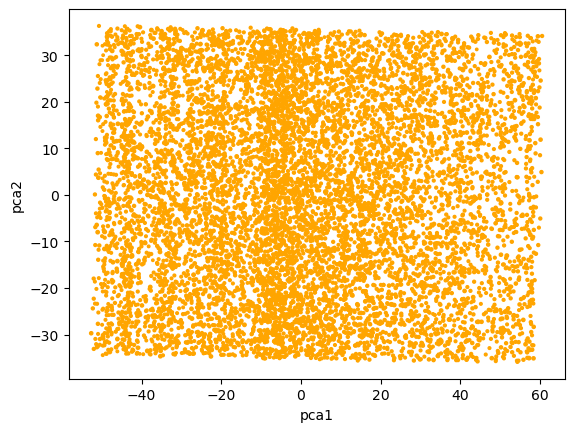

In [18]:
import matplotlib.pyplot as plt

plt.scatter(pca_df.pca1, pca_df.pca2, s=pca_df.target, c='orange')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

- target이 연속형 데이터이므로 한 눈에 확인하기엔 무리가 있지만, 각 점의 크기를 target의 값으로 시각화하였을 때  
  크게 겹치는 부분 없이 pca1과 pca2에 따라 target을 비교적 잘 나타내고 있음을 알 수 있습니다.

#### 3. 선형 회귀 분석
- 파이프라인을 구축하여, 표준화 진행 후 PCA를 통해 2차원으로 축소하여 sklearn의 LinearRegression 선형 회귀 모델로 학습합니다.

- 먼저 Loss및 R<sup>2</sup>를 평가할 함수를 정의합니다.

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = pre_a_df.iloc[:, 1:], pre_a_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=2)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=2)),
                ('l_r', LinearRegression())])

In [21]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.3862, RMSE: 0.6214, MSLE: 0.0123, RMSLE: 0.1110, R2: 0.0159


- 2차원으로 축소 후 선형 회귀 예측 결과 R<sup>2</sup>은 약 0.0159로, 매우 낮은 예측 성능을 보였다고 볼 수 있습니다.
- 따라서 트리 기반 회귀 모델을 사용하여 회귀 예측을 수행해보겠습니다.

#### 4. 트리 기반 회귀 모델을 사용한 회귀 분석
- 마찬가지로 파이프라인을 구축하여 표준화 및 차원 축소를 진행한 후 모델 학습을 진행합니다.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_a_df.iloc[:, 1:], pre_a_df.iloc[:, 0]
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(random_state=124)
lgb_r = LGBMRegressor(random_state=124)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=2)), (f'{model}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.5292, RMSE: 0.7275, MSLE: 0.0168, RMSLE: 0.1295, R2: -0.3486
RandomForestRegressor
MSE: 0.3138, RMSE: 0.5602, MSLE: 0.0100, RMSLE: 0.1000, R2: 0.2004
GradientBoostingRegressor
MSE: 0.3629, RMSE: 0.6024, MSLE: 0.0115, RMSLE: 0.1074, R2: 0.0751
XGBRegressor
MSE: 0.3193, RMSE: 0.5651, MSLE: 0.0103, RMSLE: 0.1013, R2: 0.1862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7743, number of used features: 2
[LightGBM] [Info] Start training from score 4.254680
LGBMRegressor
MSE: 0.3266, RMSE: 0.5715, MSLE: 0.0104, RMSLE: 0.1018, R2: 0.1677


- 그나마 가장 높은 R<sup>2</sup>와 가장 낮은 RMSE를 보인 RandomForestRegressor 모델 또한 R<sup>2</sup>가 약 0.2004로 매우 낮았습니다.
- 따라서 Cycle 2로 넘어가 다시 전처리를 수행합니다.

---

#### *🎈Cycle 2*
#### 1. OLS, VIF 확인 및 데이터 전처리

- 데이터의 OLS와 VIF를 확인하여 삭제할 feature를 결정해봅니다.

In [23]:
pre_a_df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,4.110874,0,19.890000,48.026667,19.033333,45.126667,20.10,45.200000,19.10,45.400000,...,17.100000,47.466667,4.900000,742.133333,91.000000,5.000000,40.000000,3.533333,38.945734,38.945734
1,4.110874,0,19.890000,47.633333,19.000000,45.090000,20.10,45.200000,19.10,45.363333,...,17.033333,47.266667,4.850000,742.216667,91.000000,5.000000,40.000000,3.466667,39.865441,39.865441
2,3.931826,0,19.856667,47.063333,19.000000,45.030000,20.10,45.200000,19.10,45.230000,...,17.000000,46.930000,4.800000,742.300000,91.000000,5.000000,40.000000,3.400000,22.763723,22.763723
3,4.110874,0,19.790000,46.656667,19.000000,44.966667,20.10,45.163333,19.10,45.090000,...,17.066667,46.790000,4.883333,742.383333,91.000000,5.000000,38.166667,3.483333,20.504204,20.504204
4,3.931826,0,19.790000,46.333333,19.000000,44.826667,20.10,45.090000,19.10,44.966667,...,17.033333,46.590000,4.966667,742.466667,91.000000,5.000000,36.333333,3.566667,40.543512,40.543512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,24.000000,45.500000,22.500000,46.400000,25.79,39.700000,24.29,42.730000,...,22.790000,46.426667,14.000000,755.800000,86.500000,1.833333,53.833333,11.700000,33.925615,33.925615
9675,5.888878,0,24.000000,45.500000,22.470000,46.382857,25.70,39.900000,24.29,42.790000,...,22.790000,46.566667,14.100000,755.800000,86.000000,2.000000,55.000000,11.700000,32.084907,32.084907
9676,4.394449,0,23.700000,47.333333,22.236000,47.374000,25.89,39.900000,24.20,42.826667,...,22.790000,46.290000,14.600000,755.950000,84.000000,2.500000,58.000000,11.850000,13.018374,13.018374
9677,4.394449,0,23.633333,47.000000,22.611429,47.184286,26.00,40.363333,24.26,43.100000,...,22.856667,46.363333,14.766667,756.000000,83.333333,2.666667,59.000000,11.900000,4.437507,4.437507


In [24]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, 1:], pre_a_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          2.450e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        18:51:26   Log-Likelihood:                         -7501.7
No. Observations:                9679   AIC:                                  1.506e+04
Df Residuals:                    9653   BIC:                                  1.524e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

- OLS 확인 결과, P>|t| 값이 높은 feature들이 존재했습니다.
- 해당 feature들은 T1, T4, RH_4, T_out, RH_out, Visibility, rv1, rv2 이었습니다.
- 삭제할 feature를 결정하기 위해 VIF를 통한 다중 공선성과, 종속변수와의 상관관계를 확인해봅니다.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [26]:
get_vif(features)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif_score,feature
0,1.220329,lights
1,4245.802489,T1
2,2336.276314,RH_1
3,3005.836818,T2
4,2652.125202,RH_2
5,1441.545046,T3
6,2086.281818,RH_3
7,1202.997855,T4
8,1445.780608,RH_4
9,1623.570061,T5


In [27]:
corr['Appliances'].sort_values(ascending=False)[1:]

lights         0.261143
T2             0.213784
T6             0.195821
T_out          0.175421
T3             0.166157
T1             0.159378
T8             0.152368
T4             0.131058
T7             0.109174
T5             0.108803
T9             0.091284
Windspeed      0.088046
RH_1           0.084757
Tdewpoint      0.055700
RH_5           0.024272
RH_3          -0.005733
RH_4          -0.006104
rv1           -0.010223
rv2           -0.010223
Visibility    -0.010854
Press_mm_hg   -0.072173
RH_2          -0.093405
RH_7          -0.095861
RH_9          -0.114999
RH_8          -0.164760
RH_6          -0.173072
RH_out        -0.225690
Name: Appliances, dtype: float64

- 앞서 OLS 결과 P>|t| 값이 높았던 feature들 중 가장 상관관계가 낮은 T1, T4, RH_4, Visibility, rv1, rv2 컬럼을 삭제해봅니다.

In [28]:
columns = ['T1', 'T4', 'RH_4', 'Visibility', 'rv1', 'rv2']

pre_a_df2 = pre_a_df.drop(labels=columns, axis=1)
pre_a_df2

,Appliances,lights,RH_1,T2,RH_2,T3,RH_3,T5,RH_5,T6,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,4.110874,0,48.026667,19.033333,45.126667,20.10,45.200000,18.000000,52.500000,4.793333,...,43.960000,18.700000,50.760000,17.100000,47.466667,4.900000,742.133333,91.000000,5.000000,3.533333
1,4.110874,0,47.633333,19.000000,45.090000,20.10,45.200000,18.000000,52.560000,4.466667,...,43.566667,18.700000,50.645000,17.033333,47.266667,4.850000,742.216667,91.000000,5.000000,3.466667
2,3.931826,0,47.063333,19.000000,45.030000,20.10,45.200000,18.000000,52.790000,4.297500,...,43.100000,18.700000,50.420000,17.000000,46.930000,4.800000,742.300000,91.000000,5.000000,3.400000
3,4.110874,0,46.656667,19.000000,44.966667,20.10,45.163333,17.926667,52.790000,4.063333,...,42.766667,18.633333,50.156667,17.066667,46.790000,4.883333,742.383333,91.000000,5.000000,3.483333
4,3.931826,0,46.333333,19.000000,44.826667,20.10,45.090000,17.890000,52.760000,4.030000,...,42.430000,18.666667,50.026667,17.033333,46.590000,4.966667,742.466667,91.000000,5.000000,3.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,45.500000,22.500000,46.400000,25.79,39.700000,22.390000,53.530000,16.263333,...,42.538571,24.000000,47.790000,22.790000,46.426667,14.000000,755.800000,86.500000,1.833333,11.700000
9675,5.888878,0,45.500000,22.470000,46.382857,25.70,39.900000,22.390000,53.400000,16.596667,...,42.500000,24.000000,47.790000,22.790000,46.566667,14.100000,755.800000,86.000000,2.000000,11.700000
9676,4.394449,0,47.333333,22.236000,47.374000,25.89,39.900000,22.390000,52.966667,18.250000,...,42.485714,23.890000,47.863333,22.790000,46.290000,14.600000,755.950000,84.000000,2.500000,11.850000
9677,4.394449,0,47.000000,22.611429,47.184286,26.00,40.363333,22.390000,52.900000,19.130000,...,42.440000,23.890000,47.900000,22.856667,46.363333,14.766667,756.000000,83.333333,2.666667,11.900000


- 다시 OLS와 VIF를 확인해봅니다.

In [29]:
from statsmodels.api import OLS

features, targets = pre_a_df2.iloc[:, 1:], pre_a_df2.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          3.032e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        18:51:27   Log-Likelihood:                         -7505.9
No. Observations:                9679   AIC:                                  1.505e+04
Df Residuals:                    9658   BIC:                                  1.520e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

- 여전히 T_out과 RH_out의 p-value 값이 너무 크므로, 해당 feature들의 VIF를 확인해봅니다.

In [30]:
get_vif(features)

,vif_score,feature
0,1.203227,lights
1,1716.976127,RH_1
2,1320.649975,T2
3,1897.625225,RH_2
4,1137.361674,T3
5,1956.532502,RH_3
6,1561.005589,T5
7,111.592551,RH_5
8,57.637869,T6
9,34.461270,RH_6


- T_out과 RH_out은 종속변수와의 상관관계 또한 낮으므로 삭제하기로 합니다.

In [31]:
pre_a_df2 = pre_a_df2.drop(labels=['T_out', 'RH_out'], axis=1)
pre_a_df2

,Appliances,lights,RH_1,T2,RH_2,T3,RH_3,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,Press_mm_hg,Windspeed,Tdewpoint
0,4.110874,0,48.026667,19.033333,45.126667,20.10,45.200000,18.000000,52.500000,4.793333,94.790000,17.890000,43.960000,18.700000,50.760000,17.100000,47.466667,742.133333,5.000000,3.533333
1,4.110874,0,47.633333,19.000000,45.090000,20.10,45.200000,18.000000,52.560000,4.466667,94.193333,17.890000,43.566667,18.700000,50.645000,17.033333,47.266667,742.216667,5.000000,3.466667
2,3.931826,0,47.063333,19.000000,45.030000,20.10,45.200000,18.000000,52.790000,4.297500,94.450000,17.856667,43.100000,18.700000,50.420000,17.000000,46.930000,742.300000,5.000000,3.400000
3,4.110874,0,46.656667,19.000000,44.966667,20.10,45.163333,17.926667,52.790000,4.063333,94.193333,17.790000,42.766667,18.633333,50.156667,17.066667,46.790000,742.383333,5.000000,3.483333
4,3.931826,0,46.333333,19.000000,44.826667,20.10,45.090000,17.890000,52.760000,4.030000,94.666667,17.790000,42.430000,18.666667,50.026667,17.033333,46.590000,742.466667,5.000000,3.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,45.500000,22.500000,46.400000,25.79,39.700000,22.390000,53.530000,16.263333,29.626667,23.921429,42.538571,24.000000,47.790000,22.790000,46.426667,755.800000,1.833333,11.700000
9675,5.888878,0,45.500000,22.470000,46.382857,25.70,39.900000,22.390000,53.400000,16.596667,28.700000,23.890000,42.500000,24.000000,47.790000,22.790000,46.566667,755.800000,2.000000,11.700000
9676,4.394449,0,47.333333,22.236000,47.374000,25.89,39.900000,22.390000,52.966667,18.250000,21.445000,23.890000,42.485714,23.890000,47.863333,22.790000,46.290000,755.950000,2.500000,11.850000
9677,4.394449,0,47.000000,22.611429,47.184286,26.00,40.363333,22.390000,52.900000,19.130000,17.026667,23.890000,42.440000,23.890000,47.900000,22.856667,46.363333,756.000000,2.666667,11.900000


In [32]:
from statsmodels.api import OLS

features, targets = pre_a_df2.iloc[:, 1:], pre_a_df2.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          3.348e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        18:51:27   Log-Likelihood:                         -7512.7
No. Observations:                9679   AIC:                                  1.506e+04
Df Residuals:                    9660   BIC:                                  1.520e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,vif_score,feature
0,1.199369,lights
1,1707.421730,RH_1
2,1317.711057,T2
3,1886.991991,RH_2
4,1135.154411,T3
5,1871.272251,RH_3
6,1551.691352,T5
7,111.456095,RH_5
8,32.130156,T6
9,30.986855,RH_6


- 여전히 VIF가 높은 feature들이 존재하여 다중 공선성이 우려되나, OLS 상에서 보았을 때 p-value가 0.05 이상인 feature가 모두 사라졌으므로,  
  PCA를 통한 차원 축소를 진행하여 회귀 예측 결과를 살펴보도록 하겠습니다.

#### 2. PCA를 통한 차원 축소

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features, targets = pre_a_df2.iloc[:, 1:], pre_a_df2.iloc[:, 0]

pca_features = pca.fit_transform(features)
print(pca_features.shape)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

(9679, 2)
[0.80831933 0.076654  ]
0.884973329047197


- 앞서 2차원으로 축소하였을 때의 explained_variance_ratio_.sum() 결과는 약 0.77로, Cycle 2에서 추가적인 전처리 후 값이 많이 증가하였음을 알 수 있습니다.

In [34]:
pca_columns = [f'pca{i+1}' for i in range(pca_features.shape[1])]
pca_df = pd.DataFrame(pca_features, columns=pca_columns)
pca_df.loc[:, 'target'] = pre_a_df['Appliances']
pca_df

,pca1,pca2,target
0,-45.628522,17.815180,4.110874
1,-45.046312,17.348290,4.110874
2,-45.268640,16.787264,3.931826
3,-44.991617,16.332094,4.110874
4,-45.404492,15.915914,3.931826
...,...,...,...
9674,21.782090,17.993107,5.198497
9675,22.719192,18.155377,5.888878
9676,29.997540,19.546499,4.394449
9677,34.442860,19.990125,4.394449


#### 3. 선형 회귀 분석
- 앞서 2차원으로 축소하였을 때 원본 feature을 약 0.88만큼 나타내고 있으므로,  
  Cycle 1과 동일한 방식으로 파이프라인을 통해 차원을 축소한 후 선형 회귀 예측을 수행해봅니다.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = pre_a_df2.iloc[:, 1:], pre_a_df2.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=3)),
                ('l_r', LinearRegression())])

In [36]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.3555, RMSE: 0.5962, MSLE: 0.0113, RMSLE: 0.1063, R2: 0.0941


- 3차원으로 축소하였을 때 R<sup>2</sup>는 약 0.0941로 2차원 또는 4차원으로 축소하였을 때보다 높았습니다.
- 하지만 여전히 R<sup>2</sup>가 너무 낮으므로, 다시 한 번 트리 기반 회귀 모델로 회귀 분석을 진행합니다.

#### 4. 트리 기반 회귀 모델을 사용한 회귀 분석

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_a_df2.iloc[:, 1:], pre_a_df2.iloc[:, 0]
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(random_state=124)
lgb_r = LGBMRegressor(random_state=124)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), (f'{model}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.4461, RMSE: 0.6679, MSLE: 0.0139, RMSLE: 0.1179, R2: -0.1368
RandomForestRegressor
MSE: 0.2348, RMSE: 0.4845, MSLE: 0.0074, RMSLE: 0.0860, R2: 0.4018
GradientBoostingRegressor
MSE: 0.3266, RMSE: 0.5715, MSLE: 0.0103, RMSLE: 0.1017, R2: 0.1677
XGBRegressor
MSE: 0.2694, RMSE: 0.5190, MSLE: 0.0086, RMSLE: 0.0925, R2: 0.3135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 7743, number of used features: 3
[LightGBM] [Info] Start training from score 4.254680
LGBMRegressor
MSE: 0.2797, RMSE: 0.5288, MSLE: 0.0089, RMSLE: 0.0942, R2: 0.2873


- 이번에는 RandomForestRegressor에서 R<sup>2</sup>가 약 0.4018로 많이 상승한 모습을 볼 수 있었습니다.
- Cycle 3으로 넘어가 feature들의 분포를 좀 더 조절하는 방향으로 수행해보고자 합니다.

---

#### *🎈Cycle 3*
#### 1. feature별 분포 확인 및 전처리

In [38]:
pre_a_df3 = pre_a_df2.copy()
pre_a_df3

,Appliances,lights,RH_1,T2,RH_2,T3,RH_3,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,Press_mm_hg,Windspeed,Tdewpoint
0,4.110874,0,48.026667,19.033333,45.126667,20.10,45.200000,18.000000,52.500000,4.793333,94.790000,17.890000,43.960000,18.700000,50.760000,17.100000,47.466667,742.133333,5.000000,3.533333
1,4.110874,0,47.633333,19.000000,45.090000,20.10,45.200000,18.000000,52.560000,4.466667,94.193333,17.890000,43.566667,18.700000,50.645000,17.033333,47.266667,742.216667,5.000000,3.466667
2,3.931826,0,47.063333,19.000000,45.030000,20.10,45.200000,18.000000,52.790000,4.297500,94.450000,17.856667,43.100000,18.700000,50.420000,17.000000,46.930000,742.300000,5.000000,3.400000
3,4.110874,0,46.656667,19.000000,44.966667,20.10,45.163333,17.926667,52.790000,4.063333,94.193333,17.790000,42.766667,18.633333,50.156667,17.066667,46.790000,742.383333,5.000000,3.483333
4,3.931826,0,46.333333,19.000000,44.826667,20.10,45.090000,17.890000,52.760000,4.030000,94.666667,17.790000,42.430000,18.666667,50.026667,17.033333,46.590000,742.466667,5.000000,3.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,45.500000,22.500000,46.400000,25.79,39.700000,22.390000,53.530000,16.263333,29.626667,23.921429,42.538571,24.000000,47.790000,22.790000,46.426667,755.800000,1.833333,11.700000
9675,5.888878,0,45.500000,22.470000,46.382857,25.70,39.900000,22.390000,53.400000,16.596667,28.700000,23.890000,42.500000,24.000000,47.790000,22.790000,46.566667,755.800000,2.000000,11.700000
9676,4.394449,0,47.333333,22.236000,47.374000,25.89,39.900000,22.390000,52.966667,18.250000,21.445000,23.890000,42.485714,23.890000,47.863333,22.790000,46.290000,755.950000,2.500000,11.850000
9677,4.394449,0,47.000000,22.611429,47.184286,26.00,40.363333,22.390000,52.900000,19.130000,17.026667,23.890000,42.440000,23.890000,47.900000,22.856667,46.363333,756.000000,2.666667,11.900000


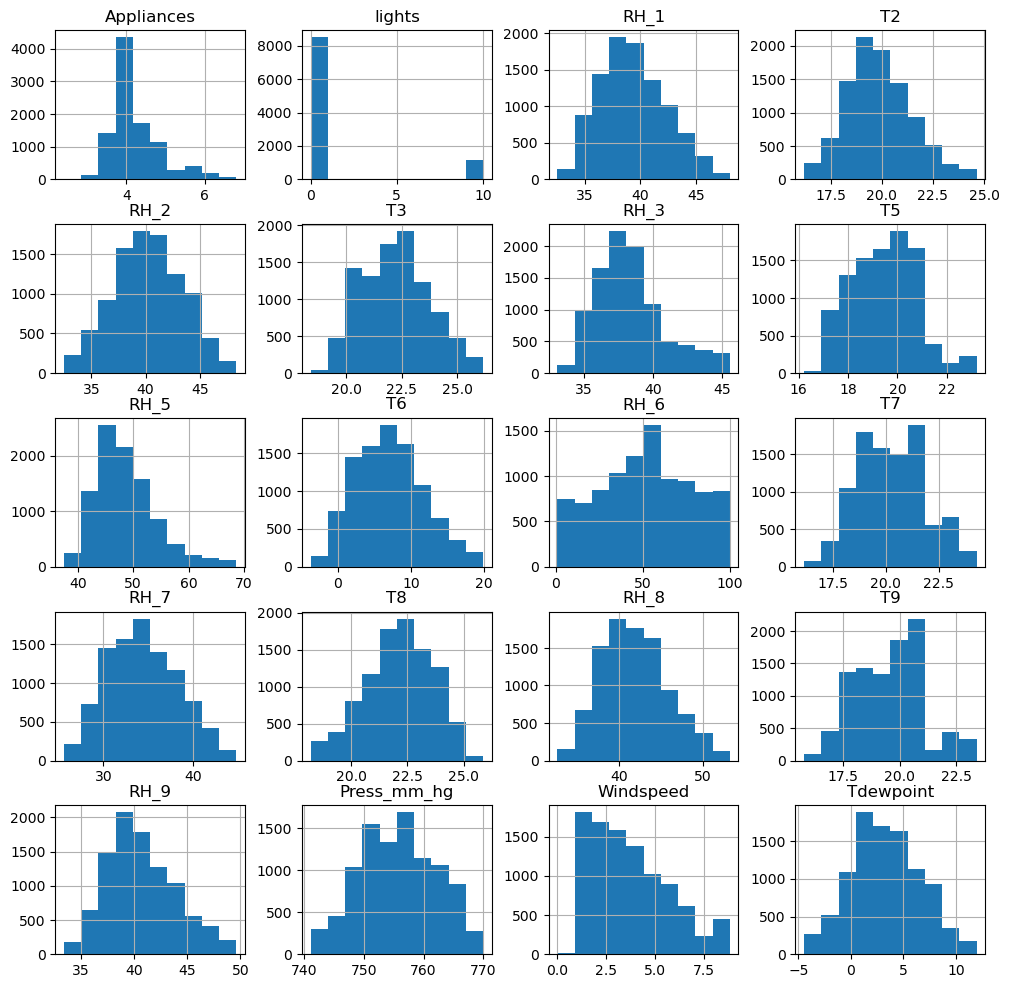

In [39]:
import matplotlib.pyplot as plt

pre_a_df3.hist(figsize=(12, 12))
plt.show()

- lights의 분포를 확인해봅니다.


<Axes: >

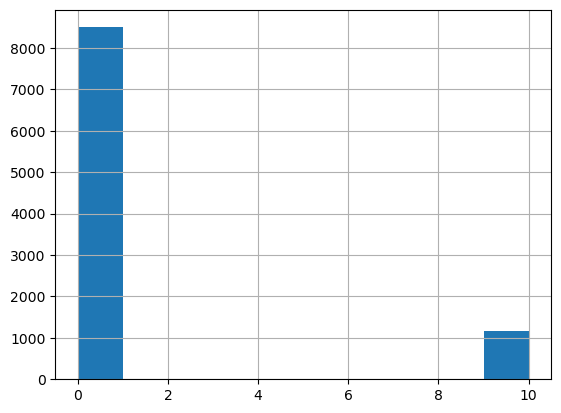

In [40]:
pre_a_df3.lights.hist()

In [41]:
pre_a_df3.lights.value_counts()

lights
0     8502
10    1177
Name: count, dtype: int64

- lights의 dtype은 int64이며, 범주형 데이터인 사실을 놓치고 있었습니다.
- 언더샘플링하기에는 비중 차이가 너무 크므로, 먼저 종속변수와의 상관관계를 확인해봅니다.

In [42]:
pre_a_df3.corr()['Appliances'].sort_values(ascending=False)[1:]

T6             0.218330
T2             0.188099
lights         0.180035
RH_1           0.153224
Windspeed      0.143707
T3             0.101854
T8             0.086115
Tdewpoint      0.059869
T9             0.030418
RH_3           0.019957
T7             0.018816
T5             0.016168
RH_2          -0.049139
RH_5          -0.059160
RH_7          -0.094571
Press_mm_hg   -0.095848
RH_9          -0.105210
RH_6          -0.127860
RH_8          -0.184905
Name: Appliances, dtype: float64

- lights 와 종속변수의 상관관계는 약 0.18로 삭제해도 무방하다고 판단하였습니다.
- 하지만 전체적으로 상관관계가 낮은 수치를 보이므로, lights 삭제 시 회귀 정확도가 오히려 떨어질 수 있기 때문에,  
  결과를 살펴본 후 다시 결정하고자 합니다.

In [43]:
pre_a_df3 = pre_a_df3.drop(labels=['lights'], axis=1)
pre_a_df3

,Appliances,RH_1,T2,RH_2,T3,RH_3,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,Press_mm_hg,Windspeed,Tdewpoint
0,4.110874,48.026667,19.033333,45.126667,20.10,45.200000,18.000000,52.500000,4.793333,94.790000,17.890000,43.960000,18.700000,50.760000,17.100000,47.466667,742.133333,5.000000,3.533333
1,4.110874,47.633333,19.000000,45.090000,20.10,45.200000,18.000000,52.560000,4.466667,94.193333,17.890000,43.566667,18.700000,50.645000,17.033333,47.266667,742.216667,5.000000,3.466667
2,3.931826,47.063333,19.000000,45.030000,20.10,45.200000,18.000000,52.790000,4.297500,94.450000,17.856667,43.100000,18.700000,50.420000,17.000000,46.930000,742.300000,5.000000,3.400000
3,4.110874,46.656667,19.000000,44.966667,20.10,45.163333,17.926667,52.790000,4.063333,94.193333,17.790000,42.766667,18.633333,50.156667,17.066667,46.790000,742.383333,5.000000,3.483333
4,3.931826,46.333333,19.000000,44.826667,20.10,45.090000,17.890000,52.760000,4.030000,94.666667,17.790000,42.430000,18.666667,50.026667,17.033333,46.590000,742.466667,5.000000,3.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,45.500000,22.500000,46.400000,25.79,39.700000,22.390000,53.530000,16.263333,29.626667,23.921429,42.538571,24.000000,47.790000,22.790000,46.426667,755.800000,1.833333,11.700000
9675,5.888878,45.500000,22.470000,46.382857,25.70,39.900000,22.390000,53.400000,16.596667,28.700000,23.890000,42.500000,24.000000,47.790000,22.790000,46.566667,755.800000,2.000000,11.700000
9676,4.394449,47.333333,22.236000,47.374000,25.89,39.900000,22.390000,52.966667,18.250000,21.445000,23.890000,42.485714,23.890000,47.863333,22.790000,46.290000,755.950000,2.500000,11.850000
9677,4.394449,47.000000,22.611429,47.184286,26.00,40.363333,22.390000,52.900000,19.130000,17.026667,23.890000,42.440000,23.890000,47.900000,22.856667,46.363333,756.000000,2.666667,11.900000


#### 2. 선형 회귀 분석

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = pre_a_df3.iloc[:, 1:], pre_a_df3.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=3)),
                ('l_r', LinearRegression())])

In [45]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.3595, RMSE: 0.5996, MSLE: 0.0114, RMSLE: 0.1069, R2: 0.0838


- lights를 삭제하기 전 선형 회귀 분석 결과 R<sup>2</sup>는 약 0.0941로, lights를 삭제한 후 성능이 더 감소하였음을 알 수 있습니다.
- 따라서 lights를 삭제하기보다는, 언더샘플링을 통해 비중을 맞춰준 후 차원 축소를 진행하여 회귀 예측을 수행하는 것이 낫다고 판단됩니다.

#### 3. lights feature에 언더샘플링 적용

In [46]:
pre_a_df3.loc[:, 'lights'] = pre_a_df2.lights
pre_a_df3

,Appliances,RH_1,T2,RH_2,T3,RH_3,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,Press_mm_hg,Windspeed,Tdewpoint,lights
0,4.110874,48.026667,19.033333,45.126667,20.10,45.200000,18.000000,52.500000,4.793333,94.790000,17.890000,43.960000,18.700000,50.760000,17.100000,47.466667,742.133333,5.000000,3.533333,0
1,4.110874,47.633333,19.000000,45.090000,20.10,45.200000,18.000000,52.560000,4.466667,94.193333,17.890000,43.566667,18.700000,50.645000,17.033333,47.266667,742.216667,5.000000,3.466667,0
2,3.931826,47.063333,19.000000,45.030000,20.10,45.200000,18.000000,52.790000,4.297500,94.450000,17.856667,43.100000,18.700000,50.420000,17.000000,46.930000,742.300000,5.000000,3.400000,0
3,4.110874,46.656667,19.000000,44.966667,20.10,45.163333,17.926667,52.790000,4.063333,94.193333,17.790000,42.766667,18.633333,50.156667,17.066667,46.790000,742.383333,5.000000,3.483333,0
4,3.931826,46.333333,19.000000,44.826667,20.10,45.090000,17.890000,52.760000,4.030000,94.666667,17.790000,42.430000,18.666667,50.026667,17.033333,46.590000,742.466667,5.000000,3.566667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,45.500000,22.500000,46.400000,25.79,39.700000,22.390000,53.530000,16.263333,29.626667,23.921429,42.538571,24.000000,47.790000,22.790000,46.426667,755.800000,1.833333,11.700000,0
9675,5.888878,45.500000,22.470000,46.382857,25.70,39.900000,22.390000,53.400000,16.596667,28.700000,23.890000,42.500000,24.000000,47.790000,22.790000,46.566667,755.800000,2.000000,11.700000,0
9676,4.394449,47.333333,22.236000,47.374000,25.89,39.900000,22.390000,52.966667,18.250000,21.445000,23.890000,42.485714,23.890000,47.863333,22.790000,46.290000,755.950000,2.500000,11.850000,0
9677,4.394449,47.000000,22.611429,47.184286,26.00,40.363333,22.390000,52.900000,19.130000,17.026667,23.890000,42.440000,23.890000,47.900000,22.856667,46.363333,756.000000,2.666667,11.900000,0


In [47]:
pre_a_df3.lights.value_counts()

lights
0     8502
10    1177
Name: count, dtype: int64

In [48]:
ones = pre_a_df3[pre_a_df3.lights == 0].sample(n=1177, random_state=124)
tens = pre_a_df3[pre_a_df3.lights == 10]

under_a_df = pd.concat([ones, tens], axis=0)
under_a_df = under_a_df.reset_index(drop=True)
under_a_df.lights.value_counts()

lights
0     1177
10    1177
Name: count, dtype: int64

array([[<Axes: title={'center': 'Appliances'}>,
        <Axes: title={'center': 'RH_1'}>, <Axes: title={'center': 'T2'}>,
        <Axes: title={'center': 'RH_2'}>],
       [<Axes: title={'center': 'T3'}>, <Axes: title={'center': 'RH_3'}>,
        <Axes: title={'center': 'T5'}>, <Axes: title={'center': 'RH_5'}>],
       [<Axes: title={'center': 'T6'}>, <Axes: title={'center': 'RH_6'}>,
        <Axes: title={'center': 'T7'}>, <Axes: title={'center': 'RH_7'}>],
       [<Axes: title={'center': 'T8'}>, <Axes: title={'center': 'RH_8'}>,
        <Axes: title={'center': 'T9'}>, <Axes: title={'center': 'RH_9'}>],
       [<Axes: title={'center': 'Press_mm_hg'}>,
        <Axes: title={'center': 'Windspeed'}>,
        <Axes: title={'center': 'Tdewpoint'}>,
        <Axes: title={'center': 'lights'}>]], dtype=object)

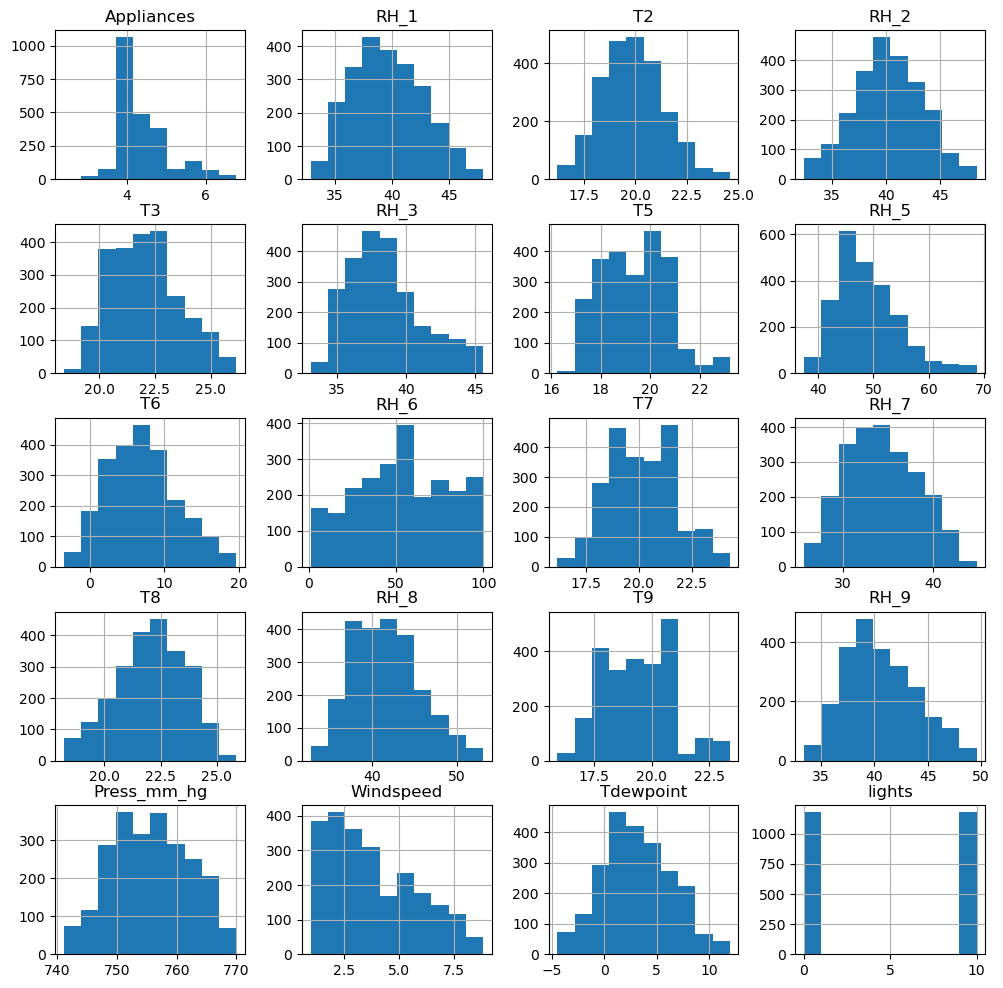

In [49]:
under_a_df.hist(figsize=(12, 12))

#### 4. 언더샘플링 이후 선형 회귀 분석

- 언더샘플링한 범주형 feature인 lights를 분리한 후 차원 축소를 진행합니다.
- 축소 후 다시 lights feature를 결합하여 회귀 분석을 수행합니다.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = under_a_df.iloc[:, 1:], under_a_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

lights = X_train.lights
lights_test = X_test.lights

X_train = X_train.drop(labels=['lights'], axis=1)
X_test = X_test.drop(labels=['lights'], axis=1)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)

std = StandardScaler()
X_test_std = std.fit_transform(X_test)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_std)

pca = PCA(n_components=4)
X_test_pca = pca.fit_transform(X_test_std)

pca_columns = [f'pca{i+1}' for i in range(X_train_pca.shape[1])]
X_train = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test = pd.DataFrame(X_test_pca, columns=pca_columns)

In [51]:
lights = pd.DataFrame(lights, columns=['lights']).reset_index(drop=True)
lights_test = pd.DataFrame(lights_test, columns=['lights']).reset_index(drop=True)
X_train = pd.concat([X_train, lights], axis=1)
X_test = pd.concat([X_test, lights_test], axis=1)

In [52]:
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [53]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.3085, RMSE: 0.5554, MSLE: 0.0097, RMSLE: 0.0986, R2: 0.1451


- 언더샘플링 이후 PCA는 4차원으로 축소했을 때 R<sup>2</sup>가 약 0.1451로 가장 높았으며, 이전 Cycle보다 상승한 모습을 보였습니다.
- 이제 트리 기반 회귀 모델로 다시 회귀 예측을 수행합니다.

#### 5. 언더샘플링 이후 트리 기반 모델을 사용한 회귀 분석

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(random_state=124)
lgb_r = LGBMRegressor(random_state=124)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.7535, RMSE: 0.8680, MSLE: 0.0235, RMSLE: 0.1534, R2: -1.0882
RandomForestRegressor
MSE: 0.3475, RMSE: 0.5895, MSLE: 0.0111, RMSLE: 0.1052, R2: 0.0369
GradientBoostingRegressor
MSE: 0.3236, RMSE: 0.5688, MSLE: 0.0103, RMSLE: 0.1016, R2: 0.1032
XGBRegressor
MSE: 0.4100, RMSE: 0.6403, MSLE: 0.0131, RMSLE: 0.1143, R2: -0.1362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 1883, number of used features: 5
[LightGBM] [Info] Start training from score 4.386744
LGBMRegressor
MSE: 0.3451, RMSE: 0.5874, MSLE: 0.0110, RMSLE: 0.1047, R2: 0.0436


- 분포가 맞지 않는 feature인 lights를 대상으로 언더샘플링을 진행하였음에도 불구하고, R<sup>2</sup>는 GBR에서 약 0.1032로 매우 낮게 나타났습니다.
- 따라서 Cycle 4에서는 가장 먼저 삭제했던 feature인 date를 각각 연도, 월, 일, 시간으로 나눈 후 새로운 feature로 추가하고자 합니다.

#### *🎈Cycle 4*
#### 1. 데이터 전처리


In [55]:
pre_a_df4 = a_df.copy()
pre_a_df4

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [56]:
pre_a_df4.date = pd.to_datetime(pre_a_df4.date)
pre_a_df4

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [57]:
pre_a_df4.date.dtype

dtype('<M8[ns]')

In [58]:
pre_a_df4.loc[:, 'year'] = pre_a_df4.date.dt.year
pre_a_df4

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016


In [59]:
pre_a_df4.loc[:, 'month'] = pre_a_df4.date.dt.month
pre_a_df4.loc[:, 'day'] = pre_a_df4.date.dt.day
pre_a_df4.loc[:, 'hour'] = pre_a_df4.date.dt.hour

pre_a_df4

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016,1,11,17
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016,1,11,17
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016,1,11,17
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016,1,11,17
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016,1,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016,5,27,17
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016,5,27,17
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016,5,27,17
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016,5,27,17


In [60]:
pre_a_df4 = pre_a_df4.drop(labels=['date'], axis=1)
pre_a_df4

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016,1,11,17
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016,1,11,17
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016,1,11,17
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016,1,11,17
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016,1,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016,5,27,17
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016,5,27,17
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016,5,27,17
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016,5,27,17


- 이제 앞선 Cycle에서 처리했던 전처리 과정을 동일하게 수행합니다.

In [61]:
# 종속변수에 np.log1p() 스케일링 적용
pre_a_df4.Appliances = np.log1p(pre_a_df4.Appliances)
pre_a_df4

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour
0,4.110874,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016,1,11,17
1,4.110874,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016,1,11,17
2,3.931826,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016,1,11,17
3,3.931826,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016,1,11,17
4,4.110874,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016,1,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,4.615121,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016,5,27,17
19731,4.510860,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016,5,27,17
19732,5.602119,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016,5,27,17
19733,6.042633,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016,5,27,17


In [62]:
# 표준화 진행 후 이상치 제거
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]

std_features = std.fit_transform(features)
std_a_df = pd.DataFrame(std_features, columns=pre_a_df4.columns[1:])

for column in std_a_df.columns:
    std_a_df = std_a_df[std_a_df[column].between(-1.96, 1.96)]
pre_a_df4 = pre_a_df4.loc[std_a_df.index]
pre_a_df4 = pre_a_df4.reset_index(drop=True)
pre_a_df4

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour
0,4.110874,0,19.890000,48.026667,19.033333,45.126667,20.10,45.200000,19.10,45.400000,...,91.000000,5.000000,40.000000,3.533333,38.945734,38.945734,2016,1,12,8
1,4.110874,0,19.890000,47.633333,19.000000,45.090000,20.10,45.200000,19.10,45.363333,...,91.000000,5.000000,40.000000,3.466667,39.865441,39.865441,2016,1,12,8
2,3.931826,0,19.856667,47.063333,19.000000,45.030000,20.10,45.200000,19.10,45.230000,...,91.000000,5.000000,40.000000,3.400000,22.763723,22.763723,2016,1,12,9
3,4.110874,0,19.790000,46.656667,19.000000,44.966667,20.10,45.163333,19.10,45.090000,...,91.000000,5.000000,38.166667,3.483333,20.504204,20.504204,2016,1,12,9
4,3.931826,0,19.790000,46.333333,19.000000,44.826667,20.10,45.090000,19.10,44.966667,...,91.000000,5.000000,36.333333,3.566667,40.543512,40.543512,2016,1,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,24.000000,45.500000,22.500000,46.400000,25.79,39.700000,24.29,42.730000,...,86.500000,1.833333,53.833333,11.700000,33.925615,33.925615,2016,5,27,7
9675,5.888878,0,24.000000,45.500000,22.470000,46.382857,25.70,39.900000,24.29,42.790000,...,86.000000,2.000000,55.000000,11.700000,32.084907,32.084907,2016,5,27,8
9676,4.394449,0,23.700000,47.333333,22.236000,47.374000,25.89,39.900000,24.20,42.826667,...,84.000000,2.500000,58.000000,11.850000,13.018374,13.018374,2016,5,27,8
9677,4.394449,0,23.633333,47.000000,22.611429,47.184286,26.00,40.363333,24.26,43.100000,...,83.333333,2.666667,59.000000,11.900000,4.437507,4.437507,2016,5,27,8


- 앞선 Cycle에서 OLS와 VIF 및 종속변수와의 상관관계를 바탕으로 제거했던 feature들을 이번에도 제거합니다.

In [63]:
columns = ['T1', 'T4', 'RH_4', 'Visibility', 'rv1', 'rv2']

pre_a_df4 = pre_a_df4.drop(labels=columns, axis=1)
pre_a_df4

,Appliances,lights,RH_1,T2,RH_2,T3,RH_3,T5,RH_5,T6,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,year,month,day,hour
0,4.110874,0,48.026667,19.033333,45.126667,20.10,45.200000,18.000000,52.500000,4.793333,...,47.466667,4.900000,742.133333,91.000000,5.000000,3.533333,2016,1,12,8
1,4.110874,0,47.633333,19.000000,45.090000,20.10,45.200000,18.000000,52.560000,4.466667,...,47.266667,4.850000,742.216667,91.000000,5.000000,3.466667,2016,1,12,8
2,3.931826,0,47.063333,19.000000,45.030000,20.10,45.200000,18.000000,52.790000,4.297500,...,46.930000,4.800000,742.300000,91.000000,5.000000,3.400000,2016,1,12,9
3,4.110874,0,46.656667,19.000000,44.966667,20.10,45.163333,17.926667,52.790000,4.063333,...,46.790000,4.883333,742.383333,91.000000,5.000000,3.483333,2016,1,12,9
4,3.931826,0,46.333333,19.000000,44.826667,20.10,45.090000,17.890000,52.760000,4.030000,...,46.590000,4.966667,742.466667,91.000000,5.000000,3.566667,2016,1,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,45.500000,22.500000,46.400000,25.79,39.700000,22.390000,53.530000,16.263333,...,46.426667,14.000000,755.800000,86.500000,1.833333,11.700000,2016,5,27,7
9675,5.888878,0,45.500000,22.470000,46.382857,25.70,39.900000,22.390000,53.400000,16.596667,...,46.566667,14.100000,755.800000,86.000000,2.000000,11.700000,2016,5,27,8
9676,4.394449,0,47.333333,22.236000,47.374000,25.89,39.900000,22.390000,52.966667,18.250000,...,46.290000,14.600000,755.950000,84.000000,2.500000,11.850000,2016,5,27,8
9677,4.394449,0,47.000000,22.611429,47.184286,26.00,40.363333,22.390000,52.900000,19.130000,...,46.363333,14.766667,756.000000,83.333333,2.666667,11.900000,2016,5,27,8


In [64]:
pre_a_df4 = pre_a_df4.drop(labels=['T_out', 'RH_out'], axis=1)
pre_a_df4

,Appliances,lights,RH_1,T2,RH_2,T3,RH_3,T5,RH_5,T6,...,RH_8,T9,RH_9,Press_mm_hg,Windspeed,Tdewpoint,year,month,day,hour
0,4.110874,0,48.026667,19.033333,45.126667,20.10,45.200000,18.000000,52.500000,4.793333,...,50.760000,17.100000,47.466667,742.133333,5.000000,3.533333,2016,1,12,8
1,4.110874,0,47.633333,19.000000,45.090000,20.10,45.200000,18.000000,52.560000,4.466667,...,50.645000,17.033333,47.266667,742.216667,5.000000,3.466667,2016,1,12,8
2,3.931826,0,47.063333,19.000000,45.030000,20.10,45.200000,18.000000,52.790000,4.297500,...,50.420000,17.000000,46.930000,742.300000,5.000000,3.400000,2016,1,12,9
3,4.110874,0,46.656667,19.000000,44.966667,20.10,45.163333,17.926667,52.790000,4.063333,...,50.156667,17.066667,46.790000,742.383333,5.000000,3.483333,2016,1,12,9
4,3.931826,0,46.333333,19.000000,44.826667,20.10,45.090000,17.890000,52.760000,4.030000,...,50.026667,17.033333,46.590000,742.466667,5.000000,3.566667,2016,1,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,45.500000,22.500000,46.400000,25.79,39.700000,22.390000,53.530000,16.263333,...,47.790000,22.790000,46.426667,755.800000,1.833333,11.700000,2016,5,27,7
9675,5.888878,0,45.500000,22.470000,46.382857,25.70,39.900000,22.390000,53.400000,16.596667,...,47.790000,22.790000,46.566667,755.800000,2.000000,11.700000,2016,5,27,8
9676,4.394449,0,47.333333,22.236000,47.374000,25.89,39.900000,22.390000,52.966667,18.250000,...,47.863333,22.790000,46.290000,755.950000,2.500000,11.850000,2016,5,27,8
9677,4.394449,0,47.000000,22.611429,47.184286,26.00,40.363333,22.390000,52.900000,19.130000,...,47.900000,22.856667,46.363333,756.000000,2.666667,11.900000,2016,5,27,8


- OLS 및 VIF를 확인하며 점차 제거할 feature들을 결정해갑니다.

In [65]:
from statsmodels.api import OLS

features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        18:51:37   Log-Likelihood:                -7467.4
No. Observations:                9679   AIC:                         1.498e+04
Df Residuals:                    9656   BIC:                         1.515e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
lights          0.0206      0.002     12.264      

,vif_score,feature
0,1.060324,lights
1,9.719705,RH_1
2,8.997354,T2
3,11.809464,RH_2
4,5.978857,T3
5,8.725472,RH_3
6,7.109982,T5
7,1.382577,RH_5
8,11.026680,T6
9,8.283946,RH_6


In [66]:
pre_a_df4.corr()['Appliances'].sort_values(ascending=False)[1:]

hour           0.300269
T6             0.218330
T2             0.188099
lights         0.180035
RH_1           0.153224
Windspeed      0.143707
T3             0.101854
T8             0.086115
Tdewpoint      0.059869
T9             0.030418
day            0.026702
RH_3           0.019957
T7             0.018816
T5             0.016168
month         -0.020818
RH_2          -0.049139
RH_5          -0.059160
RH_7          -0.094571
Press_mm_hg   -0.095848
RH_9          -0.105210
RH_6          -0.127860
RH_8          -0.184905
year                NaN
Name: Appliances, dtype: float64

In [67]:
pre_a_df4 = pre_a_df4.drop(labels=['year'], axis=1)
pre_a_df4

,Appliances,lights,RH_1,T2,RH_2,T3,RH_3,T5,RH_5,T6,...,T8,RH_8,T9,RH_9,Press_mm_hg,Windspeed,Tdewpoint,month,day,hour
0,4.110874,0,48.026667,19.033333,45.126667,20.10,45.200000,18.000000,52.500000,4.793333,...,18.700000,50.760000,17.100000,47.466667,742.133333,5.000000,3.533333,1,12,8
1,4.110874,0,47.633333,19.000000,45.090000,20.10,45.200000,18.000000,52.560000,4.466667,...,18.700000,50.645000,17.033333,47.266667,742.216667,5.000000,3.466667,1,12,8
2,3.931826,0,47.063333,19.000000,45.030000,20.10,45.200000,18.000000,52.790000,4.297500,...,18.700000,50.420000,17.000000,46.930000,742.300000,5.000000,3.400000,1,12,9
3,4.110874,0,46.656667,19.000000,44.966667,20.10,45.163333,17.926667,52.790000,4.063333,...,18.633333,50.156667,17.066667,46.790000,742.383333,5.000000,3.483333,1,12,9
4,3.931826,0,46.333333,19.000000,44.826667,20.10,45.090000,17.890000,52.760000,4.030000,...,18.666667,50.026667,17.033333,46.590000,742.466667,5.000000,3.566667,1,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,45.500000,22.500000,46.400000,25.79,39.700000,22.390000,53.530000,16.263333,...,24.000000,47.790000,22.790000,46.426667,755.800000,1.833333,11.700000,5,27,7
9675,5.888878,0,45.500000,22.470000,46.382857,25.70,39.900000,22.390000,53.400000,16.596667,...,24.000000,47.790000,22.790000,46.566667,755.800000,2.000000,11.700000,5,27,8
9676,4.394449,0,47.333333,22.236000,47.374000,25.89,39.900000,22.390000,52.966667,18.250000,...,23.890000,47.863333,22.790000,46.290000,755.950000,2.500000,11.850000,5,27,8
9677,4.394449,0,47.000000,22.611429,47.184286,26.00,40.363333,22.390000,52.900000,19.130000,...,23.890000,47.900000,22.856667,46.363333,756.000000,2.666667,11.900000,5,27,8


In [68]:
from statsmodels.api import OLS

features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          2.913e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        18:51:37   Log-Likelihood:                         -7475.3
No. Observations:                9679   AIC:                                  1.499e+04
Df Residuals:                    9657   BIC:                                  1.515e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,vif_score,feature
0,1.207065,lights
1,1733.527180,RH_1
2,1411.728981,T2
3,1915.579605,RH_2
4,1287.254753,T3
5,2048.705157,RH_3
6,1560.865072,T5
7,112.108628,RH_5
8,34.402965,T6
9,37.575778,RH_6


In [69]:
pre_a_df4 = pre_a_df4.drop(labels=['T9', 'RH_3'], axis=1)
pre_a_df4

,Appliances,lights,RH_1,T2,RH_2,T3,T5,RH_5,T6,RH_6,...,RH_7,T8,RH_8,RH_9,Press_mm_hg,Windspeed,Tdewpoint,month,day,hour
0,4.110874,0,48.026667,19.033333,45.126667,20.10,18.000000,52.500000,4.793333,94.790000,...,43.960000,18.700000,50.760000,47.466667,742.133333,5.000000,3.533333,1,12,8
1,4.110874,0,47.633333,19.000000,45.090000,20.10,18.000000,52.560000,4.466667,94.193333,...,43.566667,18.700000,50.645000,47.266667,742.216667,5.000000,3.466667,1,12,8
2,3.931826,0,47.063333,19.000000,45.030000,20.10,18.000000,52.790000,4.297500,94.450000,...,43.100000,18.700000,50.420000,46.930000,742.300000,5.000000,3.400000,1,12,9
3,4.110874,0,46.656667,19.000000,44.966667,20.10,17.926667,52.790000,4.063333,94.193333,...,42.766667,18.633333,50.156667,46.790000,742.383333,5.000000,3.483333,1,12,9
4,3.931826,0,46.333333,19.000000,44.826667,20.10,17.890000,52.760000,4.030000,94.666667,...,42.430000,18.666667,50.026667,46.590000,742.466667,5.000000,3.566667,1,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,45.500000,22.500000,46.400000,25.79,22.390000,53.530000,16.263333,29.626667,...,42.538571,24.000000,47.790000,46.426667,755.800000,1.833333,11.700000,5,27,7
9675,5.888878,0,45.500000,22.470000,46.382857,25.70,22.390000,53.400000,16.596667,28.700000,...,42.500000,24.000000,47.790000,46.566667,755.800000,2.000000,11.700000,5,27,8
9676,4.394449,0,47.333333,22.236000,47.374000,25.89,22.390000,52.966667,18.250000,21.445000,...,42.485714,23.890000,47.863333,46.290000,755.950000,2.500000,11.850000,5,27,8
9677,4.394449,0,47.000000,22.611429,47.184286,26.00,22.390000,52.900000,19.130000,17.026667,...,42.440000,23.890000,47.900000,46.363333,756.000000,2.666667,11.900000,5,27,8


In [70]:
from statsmodels.api import OLS

features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          3.205e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        18:51:38   Log-Likelihood:                         -7475.6
No. Observations:                9679   AIC:                                  1.499e+04
Df Residuals:                    9659   BIC:                                  1.513e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,vif_score,feature
0,1.203298,lights
1,1497.188037,RH_1
2,1335.656792,T2
3,1856.836074,RH_2
4,1267.281865,T3
5,1438.293622,T5
6,111.353900,RH_5
7,34.244849,T6
8,37.414471,RH_6
9,1144.880887,T7


In [71]:
pre_a_df4 = pre_a_df4.drop(labels=['day'], axis=1)
pre_a_df4

,Appliances,lights,RH_1,T2,RH_2,T3,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,RH_9,Press_mm_hg,Windspeed,Tdewpoint,month,hour
0,4.110874,0,48.026667,19.033333,45.126667,20.10,18.000000,52.500000,4.793333,94.790000,17.890000,43.960000,18.700000,50.760000,47.466667,742.133333,5.000000,3.533333,1,8
1,4.110874,0,47.633333,19.000000,45.090000,20.10,18.000000,52.560000,4.466667,94.193333,17.890000,43.566667,18.700000,50.645000,47.266667,742.216667,5.000000,3.466667,1,8
2,3.931826,0,47.063333,19.000000,45.030000,20.10,18.000000,52.790000,4.297500,94.450000,17.856667,43.100000,18.700000,50.420000,46.930000,742.300000,5.000000,3.400000,1,9
3,4.110874,0,46.656667,19.000000,44.966667,20.10,17.926667,52.790000,4.063333,94.193333,17.790000,42.766667,18.633333,50.156667,46.790000,742.383333,5.000000,3.483333,1,9
4,3.931826,0,46.333333,19.000000,44.826667,20.10,17.890000,52.760000,4.030000,94.666667,17.790000,42.430000,18.666667,50.026667,46.590000,742.466667,5.000000,3.566667,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,5.198497,0,45.500000,22.500000,46.400000,25.79,22.390000,53.530000,16.263333,29.626667,23.921429,42.538571,24.000000,47.790000,46.426667,755.800000,1.833333,11.700000,5,7
9675,5.888878,0,45.500000,22.470000,46.382857,25.70,22.390000,53.400000,16.596667,28.700000,23.890000,42.500000,24.000000,47.790000,46.566667,755.800000,2.000000,11.700000,5,8
9676,4.394449,0,47.333333,22.236000,47.374000,25.89,22.390000,52.966667,18.250000,21.445000,23.890000,42.485714,23.890000,47.863333,46.290000,755.950000,2.500000,11.850000,5,8
9677,4.394449,0,47.000000,22.611429,47.184286,26.00,22.390000,52.900000,19.130000,17.026667,23.890000,42.440000,23.890000,47.900000,46.363333,756.000000,2.666667,11.900000,5,8


In [72]:
from statsmodels.api import OLS

features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          3.373e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        18:51:38   Log-Likelihood:                         -7477.4
No. Observations:                9679   AIC:                                  1.499e+04
Df Residuals:                    9660   BIC:                                  1.513e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,vif_score,feature
0,1.202447,lights
1,1484.745827,RH_1
2,1316.452746,T2
3,1856.800323,RH_2
4,1132.698063,T3
5,1436.037124,T5
6,111.181139,RH_5
7,34.179435,T6
8,36.430696,RH_6
9,1133.956439,T7


hour           0.300269
T6             0.218330
T2             0.188099
lights         0.180035
RH_1           0.153224
Windspeed      0.143707
T3             0.101854
T8             0.086115
Tdewpoint      0.059869
T7             0.018816
T5             0.016168
month         -0.020818
RH_2          -0.049139
RH_5          -0.059160
RH_7          -0.094571
Press_mm_hg   -0.095848
RH_9          -0.105210
RH_6          -0.127860
RH_8          -0.184905
Name: Appliances, dtype: float64


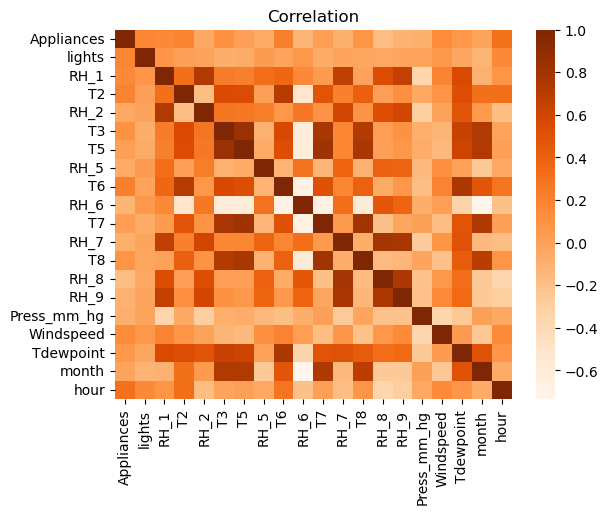

In [73]:
corr = pre_a_df4.corr()
print(corr['Appliances'].sort_values(ascending=False)[1:])
corr_heatmap = sns.heatmap(corr, cmap='Oranges')
corr_heatmap.set_title('Correlation')
plt.show()

In [74]:
columns = ['RH_2', 'RH_7', 'T5', 'Tdewpoint', 'T7']

pre_a_df4 = pre_a_df4.drop(labels=columns, axis=1)
features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.322e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        18:51:38   Log-Likelihood:                         -7753.2
No. Observations:                9679   AIC:                                  1.553e+04
Df Residuals:                    9665   BIC:                                  1.563e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,vif_score,feature
0,1.196617,lights
1,502.852241,RH_1
2,426.898475,T2
3,924.949066,T3
4,107.643819,RH_5
5,15.282786,T6
6,26.362238,RH_6
7,569.427820,T8
8,338.446890,RH_8
9,554.390317,RH_9


In [75]:
pre_a_df4 = pre_a_df4.drop(labels=['T2'], axis=1)
features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.653e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        18:51:38   Log-Likelihood:                         -7754.7
No. Observations:                9679   AIC:                                  1.554e+04
Df Residuals:                    9666   BIC:                                  1.563e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,vif_score,feature
0,1.196459,lights
1,500.745046,RH_1
2,850.962909,T3
3,106.757763,RH_5
4,12.412755,T6
5,26.112114,RH_6
6,565.691832,T8
7,335.505044,RH_8
8,554.200612,RH_9
9,582.828386,Press_mm_hg


In [76]:
pre_a_df4 = pre_a_df4.drop(labels=['lights'], axis=1)

#### 2. 선형 회귀 분석
- 전처리한 데이터를 바탕으로 선형 회귀 분석을 다시 수행합니다.

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=8)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=8)),
                ('l_r', LinearRegression())])

In [78]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.3312, RMSE: 0.5755, MSLE: 0.0105, RMSLE: 0.1024, R2: 0.1560


- 차원 축소 시의 차원을 8차원까지 올려보았으나, 여전히 R<sup>2</sup>은 약 0.1560으로 너무 낮았습니다.

#### 3. 트리 기반 모델을 사용한 회귀 분석
- 다음은 트리 기반 모델을 사용하여 회귀 분석을 진행합니다.

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(random_state=124)
lgb_r = LGBMRegressor(random_state=124)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=7)), (f'{model}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.2660, RMSE: 0.5158, MSLE: 0.0085, RMSLE: 0.0920, R2: 0.3220
RandomForestRegressor
MSE: 0.1423, RMSE: 0.3773, MSLE: 0.0045, RMSLE: 0.0672, R2: 0.6373
GradientBoostingRegressor
MSE: 0.2744, RMSE: 0.5238, MSLE: 0.0086, RMSLE: 0.0929, R2: 0.3008
XGBRegressor
MSE: 0.1694, RMSE: 0.4116, MSLE: 0.0054, RMSLE: 0.0735, R2: 0.5682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 7743, number of used features: 7
[LightGBM] [Info] Start training from score 4.254680
LGBMRegressor
MSE: 0.1876, RMSE: 0.4331, MSLE: 0.0060, RMSLE: 0.0772, R2: 0.5220


- 트리 기반 모델을 사용했을 때에는 7차원으로 축소한 후 RandomForestRegressor 모델을 사용하였을 때 가장 높은 성능을 보였습니다.
- 따라서 GridSearchCV를 통해 최적의 하이퍼파라미터 조합을 찾아 R<sup>2</sup>를 더 올리고, 오차를 줄이는 방향을 찾아보도록 합니다.

#### 4. GridSearchCV, RandomForestRegressor를 사용한 회귀 분석

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_a_df4.iloc[:, 1:], pre_a_df4.iloc[:, 0]
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {
    'pca__n_components': [6, 7, 8],
    'rfr__max_depth': [4, 8, 12, 20],
    'rfr__min_samples_split': [10, 50, 100],
    'rfr__n_estimators': [50, 100, 500, 1000]
}
kfold = KFold(n_splits=5, random_state=124, shuffle=True)

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA()), ('rfr', rf_r)])

grid_rf_r = GridSearchCV(pipe, param_grid=parameters, scoring='r2', cv=kfold, n_jobs=-1, verbose=5)
grid_rf_r.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=124, shuffle=True),
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rfr',
                                        RandomForestRegressor(random_state=124))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [6, 7, 8],
                         'rfr__max_depth': [4, 8, 12, 20],
                         'rfr__min_samples_split': [10, 50, 100],
                         'rfr__n_estimators': [50, 100, 500, 1000]},
             scoring='r2', verbose=5)

In [92]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'pca__n_components': 6, 'rfr__max_depth': 4, ...",0.206213,127
1,"{'pca__n_components': 6, 'rfr__max_depth': 4, ...",0.205683,129
2,"{'pca__n_components': 6, 'rfr__max_depth': 4, ...",0.206776,126
3,"{'pca__n_components': 6, 'rfr__max_depth': 4, ...",0.206789,125
4,"{'pca__n_components': 6, 'rfr__max_depth': 4, ...",0.203668,135
...,...,...,...
139,"{'pca__n_components': 8, 'rfr__max_depth': 20,...",0.445588,24
140,"{'pca__n_components': 8, 'rfr__max_depth': 20,...",0.377328,52
141,"{'pca__n_components': 8, 'rfr__max_depth': 20,...",0.380121,49
142,"{'pca__n_components': 8, 'rfr__max_depth': 20,...",0.379653,51


In [97]:
best_params_df = result_df.loc[result_df['rank_test_score'] == 1, ['params', 'mean_test_score', 'rank_test_score']]
best_params_df

,params,mean_test_score,rank_test_score
135,"{'pca__n_components': 8, 'rfr__max_depth': 20,...",0.562681,1


In [100]:
rf_r = grid_rf_r.best_estimator_
rf_r.get_params()

{'memory': None,
 'steps': [('std', StandardScaler()),
  ('pca', PCA(n_components=8)),
  ('rfr',
   RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=1000,
                         random_state=124))],
 'verbose': False,
 'std': StandardScaler(),
 'pca': PCA(n_components=8),
 'rfr': RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=1000,
                       random_state=124),
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 8,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'rfr__bootstrap': True,
 'rfr__ccp_alpha': 0.0,
 'rfr__criterion': 'squared_error',
 'rfr__max_depth': 20,
 'rfr__max_features': 1.0,
 'rfr__max_leaf_nodes': None,
 'rfr__max_samples': None,
 'rfr__min_impurity_decrease': 0.0,
 'rfr__min_samples_leaf': 1,
 'rfr

In [101]:
prediction = rf_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1603, RMSE: 0.4004, MSLE: 0.0050, RMSLE: 0.0710, R2: 0.5914


- GridSearchCV를 통해 교차 검증으로 학습한 best_estimator_ 모델로 예측을 수행했을 때의 R<sup>2</sup>는 약 0.5914였습니다.
- 이는 하이퍼파라미터 조정 없이 RandomForestRegressor 모델로 예측을 수행했을 때의 R<sup>2</sup>(약 0.6373)보다 낮은 수치입니다.
- 다만, cv_results_에서 보았을 때 n_estimators=1000일 때 R<sup>2</sup>가 높아지는 경향을 보였으므로 조정하여 학습해봅니다.

In [113]:
rf_r2 = RandomForestRegressor(random_state=124, n_estimators=1000)
pipe2 = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=7)), ('rfr', rf_r2)])
pipe2.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=7)),
                ('rfr',
                 RandomForestRegressor(n_estimators=1000, random_state=124))])

In [114]:
prediction = pipe2.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1406, RMSE: 0.3750, MSLE: 0.0045, RMSLE: 0.0667, R2: 0.6417


- n_estimators=1000으로 조정한 결과 R<sup>2</sup>를 약 0.6417까지 증가시킬 수 있었습니다.
- 해당 모델을 .pkl을 통해 내보내 저장해둡니다.

In [153]:
import pickle
import joblib

joblib.dump(pipe2, './energy.pkl')

['./energy.pkl']

In [154]:
energy_model = joblib.load('./energy.pkl')
prediction = energy_model.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1406, RMSE: 0.3750, MSLE: 0.0045, RMSLE: 0.0667, R2: 0.6417


#### 📌Cycle 1 ~ Cycle 4, R<sup>2</sup> 및 MSE Loss 비교
- 아래는 Cycle 별 R<sup>2</sup>의 최댓값 및 이때의 MSE Loss 값을 시각화한 그래프입니다.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\hyuns\AppData\Local\Temp\ipykernel_38808\3498364206.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=[f'Cycle{i+1}' for i in range(4)], y=mse_losses, ax=axes[1], palette='muted')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_i

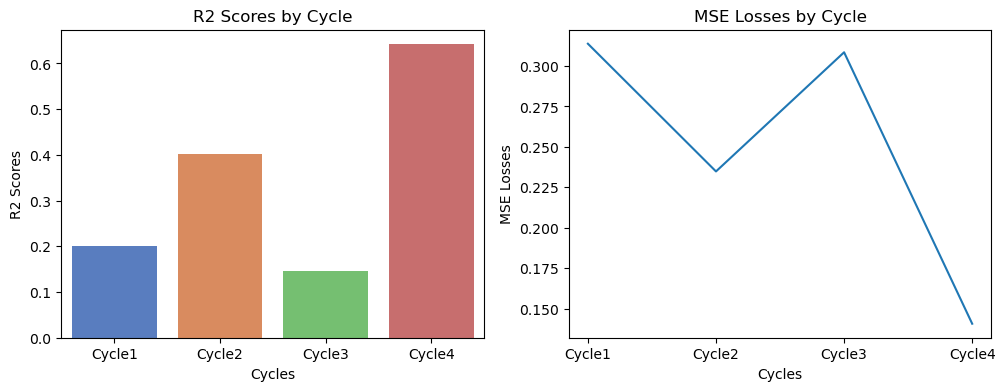

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
r2_scores = [0.2004, 0.4018, 0.1451, 0.6417]
mse_losses = [0.3138, 0.2348, 0.3085, 0.1406]

sns.barplot(x=[f'Cycle{i+1}' for i in range(4)], y=r2_scores, ax=axes[0], palette='muted')
axes[0].set_xlabel('Cycles')
axes[0].set_ylabel('R2 Scores')
axes[0].set_title('R2 Scores by Cycle')

sns.lineplot(x=[f'Cycle{i+1}' for i in range(4)], y=mse_losses, ax=axes[1], palette='muted')
axes[1].set_xlabel('Cycles')
axes[1].set_ylabel('MSE Losses')
axes[1].set_title('MSE Losses by Cycle')

plt.show()